In [31]:
import lucent
from lucent.optvis import render, param, transform, objectives

import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms

import matplotlib.pyplot as plt
from PIL import Image

from torchvision.models import GoogLeNet_Weights
from lucent.modelzoo.util import get_model_layers

weights = GoogLeNet_Weights.IMAGENET1K_V1
imagenet_labels = weights.meta["categories"]


# Load the InceptionV1 model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.googlenet(weights=models.GoogLeNet_Weights.IMAGENET1K_V1, aux_logits=True)
model.aux_logits = False # Set aux_logits to False after loading with pretrained weights
model.to(device).eval()


lucent.modelzoo.util.get_model_layers(model)

def plot_visual(layer_name, n_neuron):
  channels = range(n_neuron)
  fig, axes = plt.subplots(2, 5, figsize=(15, 6))

  for ax, ch in zip(axes.flat, channels):
      objective = objectives.channel(layer_name, ch)
      param_f = lambda: param.image(128)

      image = render.render_vis(model, objective, param_f)

      ax.imshow(image[0][0, :, :, 0:3])
      ax.set_title(f'Neuron {ch}')
      ax.axis('off')


  plt.show()

100%|██████████| 512/512 [00:11<00:00, 44.50it/s]


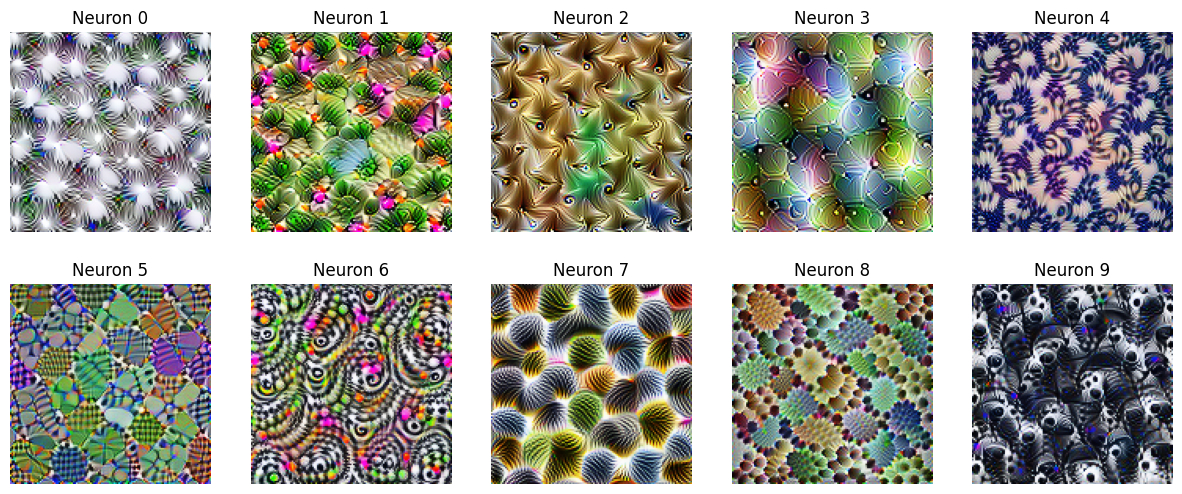

In [32]:
plot_visual('inception4a', 10)